# Práctica de Aprendizaje Automático

En esta práctica vamos a estudiar unos datos utilizando métodos de aprendizaje automático.

Esta práctica esta desarrollada por Belén Gómez Arnaldo con NIA 100472037 y Luis Gómez-Manzanilla Nieto con NIA 100472006.

---

## Lectura de datos 

Vamos a empezar leyendo el archivo de entrada *wind_ava.csv* e inctroduciendolo en un objeto de pandas

In [4]:
import pandas as pd
wind_ava = pd.read_csv('wind_ava.csv.gz', compression="gzip")

A continuación separaremos los conjuntos siendo *X* las entradas de *wind_ava* para la localización de Sotavento (13) y siendo *y* la energía eolíca que producirá el parque de Sotavento. 

In [5]:
from sklearn.model_selection import train_test_split

#Solo nos interesan las variables que terminan en .13
x = wind_ava.filter(regex='\.13$')
y = wind_ava['energy']

<>:4: SyntaxWarning: invalid escape sequence '\.'
<>:4: SyntaxWarning: invalid escape sequence '\.'
C:\Users\ferna\AppData\Local\Temp\ipykernel_8484\3719106693.py:4: SyntaxWarning: invalid escape sequence '\.'
  x = wind_ava.filter(regex='\.13$')


---

## EDA

El primer paso de la práctica es realizar un EDA simplificado para conocer las características del conjunto de datos que estamos estudiando.

Para hacer una primera aproximación de los datos podemos utilizar la función *head()* que devueve las primeras 5 entradas.

In [6]:
x.head()

,p54.162.13,p55.162.13,cape.13,p59.162.13,lai_lv.13,lai_hv.13,u10n.13,v10n.13,sp.13,stl1.13,...,t2m.13,stl2.13,stl3.13,iews.13,inss.13,stl4.13,fsr.13,flsr.13,u100.13,v100.13
0,2.510824e+06,9.186295,13.527577,1.386937e+06,2.344111,2.432983,-0.757587,-1.922799,99846.319914,280.960661,...,280.473098,281.042026,281.462478,-0.057958,-0.138650,284.684755,0.404731,-5.927092,-1.780562,-4.443617
1,2.513173e+06,8.849569,6.896412,1.153526e+06,2.343719,2.432838,-1.412620,-1.403011,99917.733093,279.296651,...,278.286616,280.747406,281.486541,-0.103576,-0.083050,284.667948,0.404920,-5.913881,-3.743344,-3.129469
2,2.509627e+06,7.924080,4.774439,1.098754e+06,2.343300,2.432704,-2.290185,-0.754580,99764.378681,278.233956,...,277.206490,280.114863,281.487095,-0.165721,-0.036241,284.651914,0.405704,-5.908272,-5.097203,-1.157748
3,2.510571e+06,6.922709,0.000000,1.076021e+06,2.342830,2.432514,-3.497855,1.271028,99672.670459,280.787263,...,280.926600,279.991138,281.472435,-0.275550,0.098192,284.636266,0.403967,-5.961995,-4.500835,1.502478
4,2.505664e+06,6.646282,0.000000,1.070830e+06,2.342437,2.432369,-0.971249,0.553060,99372.811211,279.583112,...,277.363875,280.576898,281.473265,-0.056553,0.041844,284.620232,0.403808,-5.987860,-3.392324,2.131114


A primera vista los datos de todas las columnas parecen ser numéricos, pero vamos a anlizarlos más en profundidad.

### Dimension 

In [ ]:
print('Dimensión de los datos')
print('===============================')
print(x.shape)


Dimensión de los datos
(4748, 22)


El conjunto de datos tiene 22 características y 4748 instancias.

### Análisis de variables

In [ ]:
print('Los datos son de los siguientes tipos')
print('===============================')
x.info()

Los datos son de los siguientes tipos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4748 entries, 0 to 4747
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   p54.162.13  4748 non-null   float64
 1   p55.162.13  4748 non-null   float64
 2   cape.13     4748 non-null   float64
 3   p59.162.13  4748 non-null   float64
 4   lai_lv.13   4748 non-null   float64
 5   lai_hv.13   4748 non-null   float64
 6   u10n.13     4748 non-null   float64
 7   v10n.13     4748 non-null   float64
 8   sp.13       4748 non-null   float64
 9   stl1.13     4748 non-null   float64
 10  u10.13      4748 non-null   float64
 11  v10.13      4748 non-null   float64
 12  t2m.13      4748 non-null   float64
 13  stl2.13     4748 non-null   float64
 14  stl3.13     4748 non-null   float64
 15  iews.13     4748 non-null   float64
 16  inss.13     4748 non-null   float64
 17  stl4.13     4748 non-null   float64
 18  fsr.13      4748 non-null   fl

Como se puede ver, todos los datos de las columnas son del tipo float64, es decir, no hay variables categóricas. A continuación comprobaremos si hay valores faltantes y, si es así, qué varibles los tienen. 

In [ ]:
print('Valores faltantes')
print('======================================')
print(x.isnull().sum())

Valores faltantes
p54.162.13    0
p55.162.13    0
cape.13       0
p59.162.13    0
lai_lv.13     0
lai_hv.13     0
u10n.13       0
v10n.13       0
sp.13         0
stl1.13       0
u10.13        0
v10.13        0
t2m.13        0
stl2.13       0
stl3.13       0
iews.13       0
inss.13       0
stl4.13       0
fsr.13        0
flsr.13       0
u100.13       0
v100.13       0
dtype: int64


Se puede observar que no hay ningún valor faltante en ninguna variable.

A continuación comporbaremos si hay variables con valores constantes

In [ ]:
columnas_constantes = []
for columna in x.columns:
    if x[columna].nunique() == 1:
        columnas_constantes.append(columna)

if columnas_constantes:
    print("Las siguientes columnas tienen valores constantes:")
    for columna in columnas_constantes:
        print(f"- {columna}")
else:
    print("No hay columnas con valores constantes.")

No hay columnas con valores constantes.


Aunque no haya variables constantes, puede haber variables con valores muy parecidos. Para comprobar esto vamos a calcular la varianza de las variables y lo mostraremos en un gráfico.

Varianza de las variables
p54.162.13    2.009369e+09
p55.162.13    4.293153e+01
cape.13       1.482525e+04
p59.162.13    2.151950e+12
lai_lv.13     1.579087e-01
lai_hv.13     1.355691e-02
u10n.13       9.613612e+00
v10n.13       9.100875e+00
sp.13         5.093529e+05
stl1.13       4.114356e+01
u10.13        9.973619e+00
v10.13        9.355127e+00
t2m.13        3.798852e+01
stl2.13       3.077972e+01
stl3.13       2.100230e+01
iews.13       1.346989e-01
inss.13       1.436517e-01
stl4.13       1.262291e+01
fsr.13        5.779241e-05
flsr.13       8.903704e-03
u100.13       2.344235e+01
v100.13       2.178604e+01
dtype: float64


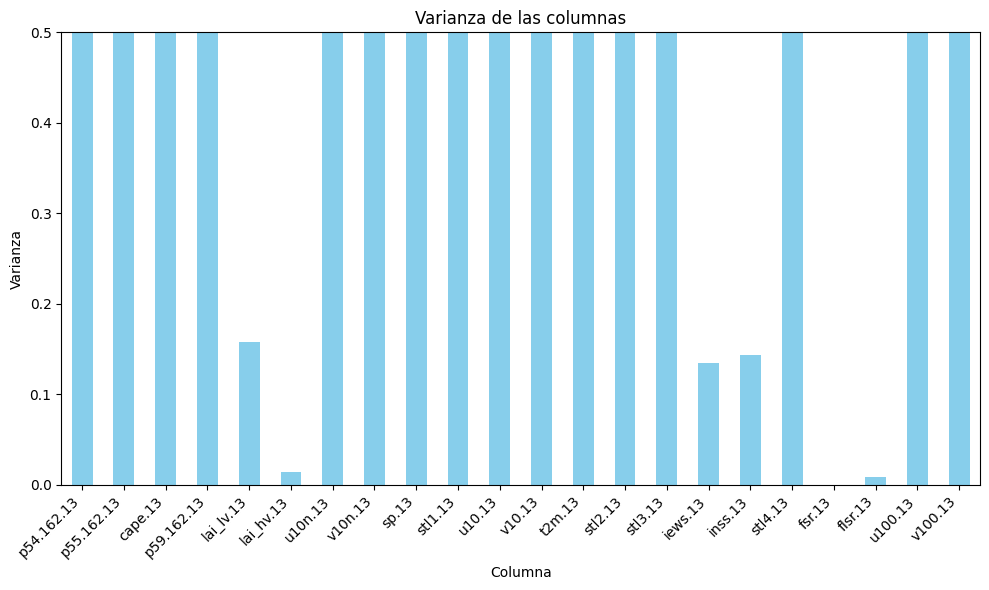

In [ ]:
print('Varianza de las variables')
print(x.var())

import matplotlib.pyplot as plt

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
x.var().plot(kind='bar', color='skyblue')
plt.title('Varianza de las columnas')
plt.xlabel('Columna')
plt.ylabel('Varianza')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.ylim(0, 0.5)
plt.show()

Como se puede ver con estos resultados, hay algunas variables que tienen una varianza muy pequeña. Esto podría sugerir que los datos de estas variables son muy parecidos y no estarían influyendo mucho en el modelo

A continuación vamos a estudiar la correlación entre las variables. Utilizaremos un mapa de calor para representar la correlación entre variables.

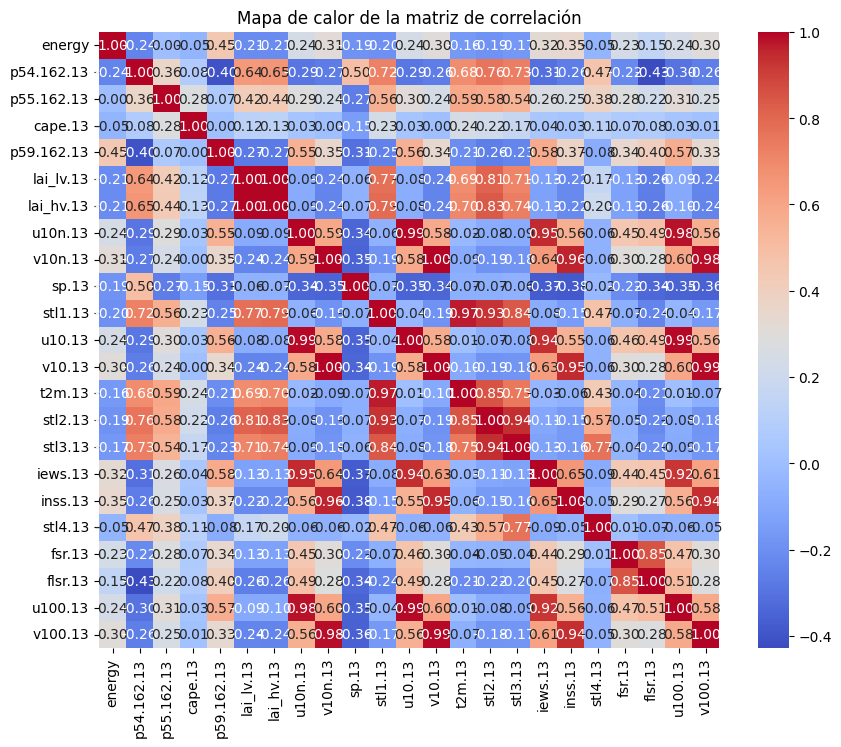

In [ ]:
import seaborn as sns
x_copia = x.copy()
x_copia.insert(0, "energy", y)

# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(x_copia.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor de la matriz de correlación')
plt.show()

Las casillas de color rojo oscuro corresponden a las varibles con más correlación. En un futuro se podrían evaluar las varibles para determinar si alguna se podría eliminar.

### Análisis de la variable de salida

Para determinar si es un problema de regresión o de clasificación, estudiaremos la variables de salida *energy*

In [ ]:
print('La variable de salida es de tipo:')
print('===============================')
y.info()

La variable de salida es de tipo:
<class 'pandas.core.series.Series'>
RangeIndex: 4748 entries, 0 to 4747
Series name: energy
Non-Null Count  Dtype  
--------------  -----  
4748 non-null   float64
dtypes: float64(1)
memory usage: 37.2 KB


La variable de salida es de tipo float64, es decir, es una variable continua, por lo que es un problema de regresión. Continuaremos analizando la distribución de la variable de salida.

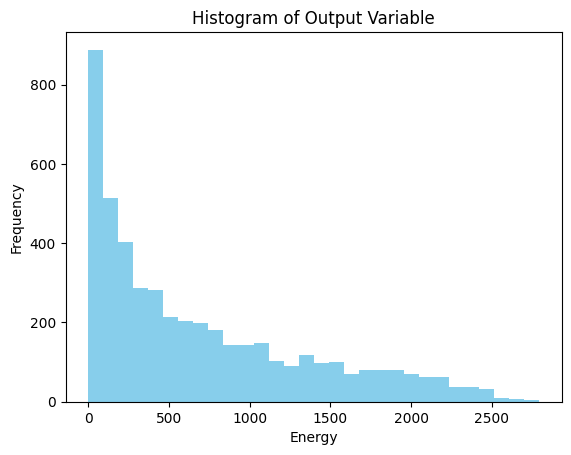

In [ ]:
plt.hist(y, bins=30, color='skyblue')
plt.title('Histogram of Output Variable')
plt.xlabel('Energy')
plt.ylabel('Frequency')
plt.show()

Como podemos observar, tiene una distribución exponencial. Esto indica que para valores de poca energía hay muchas más muestras que para valores mayores.

## Evalucaión

Para llevar a cabo la evaluación outer a utilizar Holdout, donde dividiremos el conjunto de datos en dos, uno para entrenar y otro para comprobar el modelo. El conjunto de entrenamiento es 2/3 del conjunto total. Utilizaremos 3-fold crossvalidation para el ajuste de los hiperparámetros. Para la búsqueda de los hiperparámetros utilizaremos búsqueda aleatoria ya que hay demasiados datos para utilzar GridSearch.

Primero evaluaremos los modelos con sus hiperparámetros por omisión. Depués ajustaremos los hiperpárametros. Al final incluiremos unas conclusiones sobre qué modelos son mejores y cuáles tardan menos tiempo.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.33, random_state=100472037)

### Dummy

Para una primera aproximación realizaremos el RegresorDummy basado en la media. Este es un modelo trivial y todos los modelos que hagamos más adelante deberían mejorar el resultado de este.

In [9]:
from sklearn.dummy import DummyRegressor
from sklearn import metrics
import numpy as np
import time

# Crear un modelo de referencia usando el dummy
modelo_dummy = DummyRegressor(strategy='mean')
t1 = time.time()
modelo_dummy.fit(X_train, y_train)
t2 = time.time()

# Calcular el error cuadrático medio y el coeficiente de determinación 
rmse_mean = np.sqrt(metrics.mean_squared_error(y_test, modelo_dummy.predict(X_test)))
r2_mean = metrics.r2_score(y_test, modelo_dummy.predict(X_test))



print(f"RMSE de dummy(mean): {rmse_mean}")
print(f"R^2 de dummy(mean): {r2_mean}")
print("Tiempo de entrenamiento: ", t2 - t1)

RMSE de dummy(mean): 667.6287990469438
R^2 de dummy(mean): -0.0012269034359306819
Tiempo de entrenamiento:  0.0023889541625976562


A continuación vamos a crear el regrsor dummy basado en la mediana para comprar los resultados.

In [10]:
modelo_dummy_median = DummyRegressor(strategy='median')
t1 = time.time()
modelo_dummy_median.fit(X_train, y_train)
t2 = time.time()

# Calcular el error cuadrático medio y el coeficiente de determinación 
rmse_median= np.sqrt(metrics.mean_squared_error(y_test, modelo_dummy_median.predict(X_test)))
r2_median = metrics.r2_score(y_test, modelo_dummy_median.predict(X_test))



print(f"RMSE de dummy(mean): {rmse_median}")
print(f"R^2 de dummy(mean): {r2_median}")
print("Tiempo de entrenamiento: ", t2 - t1)

RMSE de dummy(mean): 696.231776442723
R^2 de dummy(mean): -0.08885504571728964
Tiempo de entrenamiento:  0.004011869430541992


En este caso, el regresor basado en la media tiene menor error.

### KNN

### Arboles de regresión

In [ ]:
!pip install --upgrade linear-tree

^C



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


El siguinete modelo que vamos a evaluar es un árbol de regresión lineal. Primero lo evaluaremos sin ajustar los hiperparámetros.

In [15]:
from sklearn.linear_model import LinearRegression
from lineartree import LinearTreeRegressor
import time

regr = LinearTreeRegressor(base_estimator=LinearRegression())
np.random.seed(100472037) 

t1 = time.time()
regr.fit(X_train, y_train)
t2 = time.time()

y_test_pred = regr.predict(X_test)

rmse_tree = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
r2_tree = metrics.r2_score(y_test, y_test_pred)
print(f"RMSE de the tree: {rmse_tree}")
print(f"R2 de the tree: {r2_tree}")
print("Tiempo de entrenamiento: ", t2 - t1)
print("depth: ", regr.max_depth)
print("samples: ", regr.min_samples_split)

RMSE de the tree: 373.98860391251424
R2 de the tree: 0.6858195744419211
Tiempo de entrenamiento:  16.09720802307129
depth:  5
samples:  6


Aún sin haber ajustado los hiperparámetros, podemos observar que este modelo tine menor error que el modelo dummy, aunque tarda más en ejecutarse. Ahora vamos a estudiar el ajuste de los hiperparámetros para minimizar el error.

In [18]:
from sklearn.model_selection import RandomizedSearchCV, KFold

# Search space
param_grid = {'max_depth': list(range(2,16,2)),
              'min_samples_split': list(range(2,16,2))}

# Inner evaluation
inner = KFold(n_splits=3, shuffle=True, random_state=100472037)

budget = 10
regr_hp = RandomizedSearchCV(LinearTreeRegressor(base_estimator=LinearRegression()),
                         param_grid,
                         scoring='neg_mean_squared_error',
                         cv=inner,
                         n_jobs=-1, verbose=1,
                         n_iter=budget
                        )
np.random.seed(100472037)

t1 = time.time()
regr_hp.fit(X=X_train, y=y_train)
t2 = time.time()

y_test_pred = regr_hp.predict(X_test)

rmse_tree_hp = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
r2_tree_hp = metrics.r2_score(y_test, y_test_pred)
print(f"RMSE de the tree: {rmse_tree_hp}")
print(f"R2 de the tree: {r2_tree_hp}")
print("Tiempo de entrenamiento: ", t2 - t1)
regr_hp.best_params_, -regr_hp.best_score_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
6 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python312\Lib\site-packages\lineartree\lineartree.py", line 187, in fit
    self._fit(X, y, sample_weight)
  File "c:\Python312\Lib\site-packages\lineartree\_classes.py", line 476, in _fit
    raise ValueError(
ValueError: min_samples_split must be an integer greater than 5 or a float in (0.0, 1.0); got the integer 2

-----

RMSE de the tree: 373.98860391251424
R2 de the tree: 0.6858195744419211
Tiempo de entrenamiento:  96.40130162239075


({'min_samples_split': 8, 'max_depth': 4}, 152601.30994544283)

In [ ]:
leaves = regr.summary(feature_names=x, only_leaves=True, max_depth=None)

In [ ]:
leaves

{3: {'loss': 150881.87426, 'samples': 593, 'models': LinearRegression()},
 5: {'loss': 176307.83582, 'samples': 393, 'models': LinearRegression()},
 6: {'loss': 76966.73165, 'samples': 340, 'models': LinearRegression()},
 11: {'loss': 30860.87286, 'samples': 330, 'models': LinearRegression()},
 12: {'loss': 64405.8892, 'samples': 337, 'models': LinearRegression()},
 10: {'loss': 113027.70096, 'samples': 393, 'models': LinearRegression()},
 13: {'loss': 166827.08317, 'samples': 397, 'models': LinearRegression()},
 14: {'loss': 199608.59593, 'samples': 398, 'models': LinearRegression()}}

In [ ]:
from pprint import pprint
model_7_coefs = leaves[3]['models'].coef_
model_7_intercept = leaves[3]['models'].intercept_
pprint(list(zip(x, model_7_coefs)))
pprint(f'intercept: {model_7_intercept}')

[('p54.162.13', 0.000539153),
 ('p55.162.13', 1.6561153),
 ('cape.13', -0.01647157),
 ('p59.162.13', -3.0042181e-06),
 ('lai_lv.13', -13.993952),
 ('lai_hv.13', -4.35802),
 ('u10n.13', 80.54591),
 ('v10n.13', -173.23636),
 ('sp.13', 0.11651182),
 ('stl1.13', 67.4604),
 ('u10.13', 36.24112),
 ('v10.13', -124.22104),
 ('t2m.13', -113.34805),
 ('stl2.13', -13.809576),
 ('stl3.13', 24.71732),
 ('iews.13', -13.483054),
 ('inss.13', -5.5437818),
 ('stl4.13', 13.916422),
 ('fsr.13', -0.9775111),
 ('flsr.13', -15.602722),
 ('u100.13', -304.6188),
 ('v100.13', 162.75768)]
'intercept: -7368.22998046875'


### Regresores lineales

In [21]:
# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.compose import make_column_transformer
from sklearn.compose import TransformedTargetRegressor

In [19]:
# Creación y entrenamiento del modelo lineal
# ==============================================================================

regr = LinearRegression()
np.random.seed(100472037)

t1 = time.time()
regr.fit(X_train, y_train) #entrena
t2 = time.time()

y_test_pred = regr.predict(X_test)

rmse_lineal = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
r2_lineal = metrics.r2_score(y_test, y_test_pred)
print(f"RMSE de the tree: {rmse_lineal}")
print(f"R2 de the tree: {r2_lineal}")
print("Tiempo de entrenamiento: ", t2 - t1)

RMSE de the tree: 547.627113329036
R2 de the tree: 0.3263531698315265
Tiempo de entrenamiento:  0.009784221649169922


In [22]:
regr = LassoCV(cv= 3)
np.random.seed(100472037)

t1 = time.time()
regr.fit(X_train, y_train) #entrena
t2 = time.time()

y_test_pred = regr.predict(X_test)

rmse_lineal = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
r2_lineal = metrics.r2_score(y_test, y_test_pred)
print(f"RMSE de the tree: {rmse_lineal}")
print(f"R2 de the tree: {r2_lineal}")
print("Tiempo de entrenamiento: ", t2 - t1)

RMSE de the tree: 597.1088813938959
R2 de the tree: 0.19911631232155014
Tiempo de entrenamiento:  0.06036853790283203


In [23]:
regr = LassoCV(alphas = np.logspace(-9, 3, 200),cv= 3)
np.random.seed(100472037)

t1 = time.time()
regr.fit(X_train, y_train) #entrena
t2 = time.time()

y_test_pred = regr.predict(X_test)

rmse_lineal = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
r2_lineal = metrics.r2_score(y_test, y_test_pred)
print(f"RMSE de the tree: {rmse_lineal}")
print(f"R2 de the tree: {r2_lineal}")
print("Tiempo de entrenamiento: ", t2 - t1)


c:\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 290617484.3120489, tolerance: 91793.46926881353
  model = cd_fast.enet_coordinate_descent_gram(
c:\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 304414312.579615, tolerance: 91793.46926881353
  model = cd_fast.enet_coordinate_descent_gram(
c:\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 309090693.37315947, tolerance: 91793.46926881353
  model = cd_fast.enet_coordinate_descent_gram(
c:\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. Yo

RMSE de the tree: 548.2354514992431
R2 de the tree: 0.3248556811626738
Tiempo de entrenamiento:  0.7432258129119873


c:\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.626e+08, tolerance: 1.404e+05
  model = cd_fast.enet_coordinate_descent(
